<a href="https://colab.research.google.com/github/rassu-123/rough_/blob/main/Udacity_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir


     |████████████████████████████████| 1.7 MB 5.3 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     |████████████████████████████████| 958 kB 5.2 MB/s            
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


     |████████████████████████████████| 47.3 MB 1.3 MB/s            
     |████████████████████████████████| 8.6 MB 34.2 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080040 sha256=6fa2c6002fe9dc80553930e83b20d570960324bd48dbab352a4aa7eb5cb09045
  Stored in directory: /root/.cache/pip/wheels/9f/9e/ac/f24f30e119df73511fde9af8aa747217ac8824e662037ba9a8
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.3.3
    Uninstalling bokeh-2.3.3:
      Successfully uninstalled bokeh-2.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 0.12.1 requires bokeh<2.4.0,>=2.3.0, but you ha

In [5]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "rasshigupta"
kaggle_key = "5052e266412f63032784534504587f4b"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

In [7]:
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/633k [00:00<?, ?B/s]
100% 633k/633k [00:00<00:00, 43.0MB/s]
  0% 0.00/140k [00:00<?, ?B/s]
100% 140k/140k [00:00<00:00, 43.6MB/s]
  0% 0.00/316k [00:00<?, ?B/s]
100% 316k/316k [00:00<00:00, 93.8MB/s]
unzip:  cannot find or open bike-sharing-demand.zip, bike-sharing-demand.zip.zip or bike-sharing-demand.zip.ZIP.


In [8]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [9]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [65]:
file = open('train.csv')

In [27]:
train = pd.read_csv("train.csv")
train['count']

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [11]:
test=pd.read_csv("test.csv")
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [12]:
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [70]:
import numpy as np

In [13]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [73]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -1.275424      27.712534  2905.363056                0.000583           0.362776            3       True         22
1     ExtraTreesMSE_BAG_L2  -1.350878      18.489982  1641.687880                0.411485           4.538968            2       True         17
2   RandomForestMSE_BAG_L2  -1.378284      18.465343  1657.300578                0.386846          20.151666            2       True         15
3      WeightedEnsemble_L2  -1.580284      17.796350  1614.564681                0.000605           0.485872            2       True         12
4     LightGBMLarge_BAG_L2  -1.704827      18.382631  1667.797233                0.304134          30.648322            2       True         21
5          LightGBM_BAG_L2  -2.018158      18.259929  1649.988864         

{'leaderboard':                      model  score_val  ...  can_infer  fit_order
 0      WeightedEnsemble_L3  -1.275424  ...       True         22
 1     ExtraTreesMSE_BAG_L2  -1.350878  ...       True         17
 2   RandomForestMSE_BAG_L2  -1.378284  ...       True         15
 3      WeightedEnsemble_L2  -1.580284  ...       True         12
 4     LightGBMLarge_BAG_L2  -1.704827  ...       True         21
 5          LightGBM_BAG_L2  -2.018158  ...       True         14
 6           XGBoost_BAG_L2  -2.213821  ...       True         19
 7     ExtraTreesMSE_BAG_L1  -2.381391  ...       True          7
 8   NeuralNetFastAI_BAG_L2  -2.400986  ...       True         18
 9    NeuralNetMXNet_BAG_L2  -2.557786  ...       True         20
 10         CatBoost_BAG_L2  -2.601147  ...       True         16
 11  RandomForestMSE_BAG_L1  -2.749920  ...       True          5
 12       LightGBMXT_BAG_L2  -2.941115  ...       True         13
 13  NeuralNetFastAI_BAG_L1  -2.980127  ...       True       

In [72]:
predictor= TabularPredictor(label ="count").fit(train_data = train, verbosity = 2,presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20220116_203905/"
Presets specified: ['best_quality']
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220116_203905/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 11
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    9825.21 MB
	Train Data (Original)  Memory Usage: 1.7 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_

[1000]	train_set's rmse: 3.81021	valid_set's rmse: 4.45826
[2000]	train_set's rmse: 3.00188	valid_set's rmse: 4.00347
[3000]	train_set's rmse: 2.57549	valid_set's rmse: 3.79608
[4000]	train_set's rmse: 2.27743	valid_set's rmse: 3.68307
[5000]	train_set's rmse: 2.05305	valid_set's rmse: 3.61236
[6000]	train_set's rmse: 1.87048	valid_set's rmse: 3.55501
[7000]	train_set's rmse: 1.72197	valid_set's rmse: 3.51712
[8000]	train_set's rmse: 1.59492	valid_set's rmse: 3.48937
[9000]	train_set's rmse: 1.48596	valid_set's rmse: 3.46443
[10000]	train_set's rmse: 1.39249	valid_set's rmse: 3.44008


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 4.24075	valid_set's rmse: 5.53525
[2000]	train_set's rmse: 3.18891	valid_set's rmse: 4.68387
[3000]	train_set's rmse: 2.71965	valid_set's rmse: 4.43005
[4000]	train_set's rmse: 2.39864	valid_set's rmse: 4.26434
[5000]	train_set's rmse: 2.16259	valid_set's rmse: 4.16369
[6000]	train_set's rmse: 1.97398	valid_set's rmse: 4.09425
[7000]	train_set's rmse: 1.81746	valid_set's rmse: 4.03951
[8000]	train_set's rmse: 1.68692	valid_set's rmse: 3.99898
[9000]	train_set's rmse: 1.57016	valid_set's rmse: 3.96068
[10000]	train_set's rmse: 1.46793	valid_set's rmse: 3.9359


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 4.07554	valid_set's rmse: 5.13386
[2000]	train_set's rmse: 3.15046	valid_set's rmse: 4.60472
[3000]	train_set's rmse: 2.6831	valid_set's rmse: 4.36115
[4000]	train_set's rmse: 2.36702	valid_set's rmse: 4.23357
[5000]	train_set's rmse: 2.12522	valid_set's rmse: 4.14519
[6000]	train_set's rmse: 1.93463	valid_set's rmse: 4.06913
[7000]	train_set's rmse: 1.78024	valid_set's rmse: 4.02963
[8000]	train_set's rmse: 1.6523	valid_set's rmse: 3.99146
[9000]	train_set's rmse: 1.53811	valid_set's rmse: 3.96651
[10000]	train_set's rmse: 1.4378	valid_set's rmse: 3.93954


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 3.90445	valid_set's rmse: 5.71146
[2000]	train_set's rmse: 3.0128	valid_set's rmse: 5.07119
[3000]	train_set's rmse: 2.56036	valid_set's rmse: 4.80976
[4000]	train_set's rmse: 2.24963	valid_set's rmse: 4.65115
[5000]	train_set's rmse: 2.01789	valid_set's rmse: 4.55473
[6000]	train_set's rmse: 1.83795	valid_set's rmse: 4.49121
[7000]	train_set's rmse: 1.68689	valid_set's rmse: 4.44133
[8000]	train_set's rmse: 1.55812	valid_set's rmse: 4.39665
[9000]	train_set's rmse: 1.45057	valid_set's rmse: 4.36889
[10000]	train_set's rmse: 1.3585	valid_set's rmse: 4.34192


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 3.79387	valid_set's rmse: 4.16408
[2000]	train_set's rmse: 2.9718	valid_set's rmse: 3.6992
[3000]	train_set's rmse: 2.54905	valid_set's rmse: 3.51888
[4000]	train_set's rmse: 2.26218	valid_set's rmse: 3.4266
[5000]	train_set's rmse: 2.03384	valid_set's rmse: 3.35388
[6000]	train_set's rmse: 1.85843	valid_set's rmse: 3.31955
[7000]	train_set's rmse: 1.71589	valid_set's rmse: 3.29353
[8000]	train_set's rmse: 1.59223	valid_set's rmse: 3.27782
[9000]	train_set's rmse: 1.48143	valid_set's rmse: 3.26781
[10000]	train_set's rmse: 1.38494	valid_set's rmse: 3.26056


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 3.88282	valid_set's rmse: 5.1795
[2000]	train_set's rmse: 3.06424	valid_set's rmse: 4.54369
[3000]	train_set's rmse: 2.61735	valid_set's rmse: 4.2615
[4000]	train_set's rmse: 2.31505	valid_set's rmse: 4.08911
[5000]	train_set's rmse: 2.09186	valid_set's rmse: 3.99323
[6000]	train_set's rmse: 1.91182	valid_set's rmse: 3.944
[7000]	train_set's rmse: 1.76399	valid_set's rmse: 3.90751
[8000]	train_set's rmse: 1.63955	valid_set's rmse: 3.87854
[9000]	train_set's rmse: 1.52853	valid_set's rmse: 3.85052
[10000]	train_set's rmse: 1.43042	valid_set's rmse: 3.83347


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 3.99577	valid_set's rmse: 4.77857
[2000]	train_set's rmse: 3.09812	valid_set's rmse: 4.1758
[3000]	train_set's rmse: 2.63443	valid_set's rmse: 3.95679
[4000]	train_set's rmse: 2.32518	valid_set's rmse: 3.84125
[5000]	train_set's rmse: 2.09146	valid_set's rmse: 3.78939
[6000]	train_set's rmse: 1.91683	valid_set's rmse: 3.74915
[7000]	train_set's rmse: 1.76487	valid_set's rmse: 3.73344
[8000]	train_set's rmse: 1.6352	valid_set's rmse: 3.73373
[9000]	train_set's rmse: 1.52314	valid_set's rmse: 3.7121
[10000]	train_set's rmse: 1.42703	valid_set's rmse: 3.71298


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 3.89306	valid_set's rmse: 5.01599
[2000]	train_set's rmse: 2.99601	valid_set's rmse: 4.37975
[3000]	train_set's rmse: 2.54956	valid_set's rmse: 4.14702
[4000]	train_set's rmse: 2.25054	valid_set's rmse: 4.05135
[5000]	train_set's rmse: 2.02324	valid_set's rmse: 3.9619
[6000]	train_set's rmse: 1.84859	valid_set's rmse: 3.92701
[7000]	train_set's rmse: 1.70297	valid_set's rmse: 3.88864
[8000]	train_set's rmse: 1.58163	valid_set's rmse: 3.86369
[9000]	train_set's rmse: 1.47295	valid_set's rmse: 3.84563
[10000]	train_set's rmse: 1.37552	valid_set's rmse: 3.83929


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 3.91649	valid_set's rmse: 4.8339
[2000]	train_set's rmse: 3.01977	valid_set's rmse: 4.15741
[3000]	train_set's rmse: 2.57861	valid_set's rmse: 3.89659
[4000]	train_set's rmse: 2.27467	valid_set's rmse: 3.74369
[5000]	train_set's rmse: 2.04427	valid_set's rmse: 3.63111
[6000]	train_set's rmse: 1.86392	valid_set's rmse: 3.56273
[7000]	train_set's rmse: 1.71599	valid_set's rmse: 3.5188
[8000]	train_set's rmse: 1.58731	valid_set's rmse: 3.4774
[9000]	train_set's rmse: 1.47758	valid_set's rmse: 3.44369
[10000]	train_set's rmse: 1.38239	valid_set's rmse: 3.42649


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 3.97272	valid_set's rmse: 4.57348
[2000]	train_set's rmse: 3.11741	valid_set's rmse: 3.9432
[3000]	train_set's rmse: 2.66465	valid_set's rmse: 3.64224
[4000]	train_set's rmse: 2.35313	valid_set's rmse: 3.46433
[5000]	train_set's rmse: 2.12222	valid_set's rmse: 3.34858
[6000]	train_set's rmse: 1.93764	valid_set's rmse: 3.26953
[7000]	train_set's rmse: 1.78714	valid_set's rmse: 3.20213
[8000]	train_set's rmse: 1.65825	valid_set's rmse: 3.16074
[9000]	train_set's rmse: 1.5441	valid_set's rmse: 3.12295
[10000]	train_set's rmse: 1.44278	valid_set's rmse: 3.09092


	-3.6983	 = Validation score   (root_mean_squared_error)
	122.32s	 = Training   runtime
	7.42s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ...
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 1.13366	valid_set's rmse: 2.70675


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a f

[1000]	train_set's rmse: 1.09904	valid_set's rmse: 3.56535
[2000]	train_set's rmse: 0.701408	valid_set's rmse: 3.51389
[3000]	train_set's rmse: 0.510153	valid_set's rmse: 3.48911
[4000]	train_set's rmse: 0.392257	valid_set's rmse: 3.48472
[5000]	train_set's rmse: 0.315532	valid_set's rmse: 3.47634
[6000]	train_set's rmse: 0.258849	valid_set's rmse: 3.46942
[7000]	train_set's rmse: 0.216709	valid_set's rmse: 3.46451
[8000]	train_set's rmse: 0.183002	valid_set's rmse: 3.46276
[9000]	train_set's rmse: 0.153653	valid_set's rmse: 3.46034
[10000]	train_set's rmse: 0.130523	valid_set's rmse: 3.45529


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a f

[1000]	train_set's rmse: 1.15667	valid_set's rmse: 2.44063


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 1.1813	valid_set's rmse: 2.47803
[2000]	train_set's rmse: 0.772656	valid_set's rmse: 2.35518
[3000]	train_set's rmse: 0.548053	valid_set's rmse: 2.33727
[4000]	train_set's rmse: 0.415909	valid_set's rmse: 2.33007
[5000]	train_set's rmse: 0.330345	valid_set's rmse: 2.32992


	-3.096	 = Validation score   (root_mean_squared_error)
	27.26s	 = Training   runtime
	1.27s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ...
	-2.7499	 = Validation score   (root_mean_squared_error)
	8.33s	 = Training   runtime
	0.39s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ...
	-3.0941	 = Validation score   (root_mean_squared_error)
	80.57s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1 ...
	-2.3814	 = Validation score   (root_mean_squared_error)
	3.52s	 = Training   runtime
	0.41s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ...
	-2.9801	 = Validation score   (root_mean_squared_error)
	106.19s	 = Training   runtime
	0.27s	 = Validation runtime
Fitting model: XGBoost_BAG_L1 ...
	-4.938	 = Validation score   (root_mean_squared_error)
	23.06s	 = Training   runtime
	0.18s	 = Validation runtime
Fitting model: NeuralNetMXNet_BAG_L1 ...
	-3.824	 = Validation score   (root_mean_squared_error)
	1101.93s	 = Trai

[1000]	train_set's rmse: 0.402428	valid_set's rmse: 4.13675
[2000]	train_set's rmse: 0.141146	valid_set's rmse: 4.12141
[3000]	train_set's rmse: 0.0606962	valid_set's rmse: 4.1208


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 0.414902	valid_set's rmse: 4.07654
[2000]	train_set's rmse: 0.142337	valid_set's rmse: 4.05677
[3000]	train_set's rmse: 0.0592196	valid_set's rmse: 4.05403
[4000]	train_set's rmse: 0.0265437	valid_set's rmse: 4.05263
[5000]	train_set's rmse: 0.0132405	valid_set's rmse: 4.05211
[6000]	train_set's rmse: 0.00665664	valid_set's rmse: 4.05202
[7000]	train_set's rmse: 0.00342804	valid_set's rmse: 4.05194
[8000]	train_set's rmse: 0.00187154	valid_set's rmse: 4.05192
[9000]	train_set's rmse: 0.00099981	valid_set's rmse: 4.05191
[10000]	train_set's rmse: 0.000543774	valid_set's rmse: 4.0519


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 0.411101	valid_set's rmse: 4.74863


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 0.3903	valid_set's rmse: 4.71551
[2000]	train_set's rmse: 0.137069	valid_set's rmse: 4.7095
[3000]	train_set's rmse: 0.0554818	valid_set's rmse: 4.70835


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 0.404049	valid_set's rmse: 3.90989
[2000]	train_set's rmse: 0.135945	valid_set's rmse: 3.89503
[3000]	train_set's rmse: 0.055644	valid_set's rmse: 3.89105
[4000]	train_set's rmse: 0.0247147	valid_set's rmse: 3.88953
[5000]	train_set's rmse: 0.0133611	valid_set's rmse: 3.88943
[6000]	train_set's rmse: 0.00902486	valid_set's rmse: 3.88936
[7000]	train_set's rmse: 0.00765732	valid_set's rmse: 3.88933
[8000]	train_set's rmse: 0.00728203	valid_set's rmse: 3.8893
[9000]	train_set's rmse: 0.00718073	valid_set's rmse: 3.8893
[10000]	train_set's rmse: 0.00715353	valid_set's rmse: 3.8893


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 0.395931	valid_set's rmse: 4.40914
[2000]	train_set's rmse: 0.135009	valid_set's rmse: 4.38671
[3000]	train_set's rmse: 0.0561617	valid_set's rmse: 4.38425
[4000]	train_set's rmse: 0.0266129	valid_set's rmse: 4.38398


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 0.426378	valid_set's rmse: 4.23149
[2000]	train_set's rmse: 0.148852	valid_set's rmse: 4.2162
[3000]	train_set's rmse: 0.0617572	valid_set's rmse: 4.21124
[4000]	train_set's rmse: 0.02908	valid_set's rmse: 4.21023
[5000]	train_set's rmse: 0.0150022	valid_set's rmse: 4.21039


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 0.424079	valid_set's rmse: 3.88048
[2000]	train_set's rmse: 0.144899	valid_set's rmse: 3.85635
[3000]	train_set's rmse: 0.0622484	valid_set's rmse: 3.85375


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 0.414424	valid_set's rmse: 3.68332
[2000]	train_set's rmse: 0.142956	valid_set's rmse: 3.66235
[3000]	train_set's rmse: 0.0601627	valid_set's rmse: 3.65737


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 0.414451	valid_set's rmse: 3.60926
[2000]	train_set's rmse: 0.142759	valid_set's rmse: 3.59677
[3000]	train_set's rmse: 0.0588287	valid_set's rmse: 3.59384
[4000]	train_set's rmse: 0.0274684	valid_set's rmse: 3.59251
[5000]	train_set's rmse: 0.0151439	valid_set's rmse: 3.59215
[6000]	train_set's rmse: 0.00979479	valid_set's rmse: 3.59204
[7000]	train_set's rmse: 0.00793995	valid_set's rmse: 3.59194
[8000]	train_set's rmse: 0.00738737	valid_set's rmse: 3.59191
[9000]	train_set's rmse: 0.00721841	valid_set's rmse: 3.59189
[10000]	train_set's rmse: 0.00716584	valid_set's rmse: 3.59188


	-4.1376	 = Validation score   (root_mean_squared_error)
	163.93s	 = Training   runtime
	5.52s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	-1.5803	 = Validation score   (root_mean_squared_error)
	0.49s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting 9 L2 models ...
Fitting model: LightGBMXT_BAG_L2 ...
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 2.38665	valid_set's rmse: 3.60674
[2000]	train_set's rmse: 1.89183	valid_set's rmse: 3.51722
[3000]	train_set's rmse: 1.59722	valid_set's rmse: 3.47009


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 2.42089	valid_set's rmse: 3.69098
[2000]	train_set's rmse: 1.91912	valid_set's rmse: 3.55019
[3000]	train_set's rmse: 1.61584	valid_set's rmse: 3.47099
[4000]	train_set's rmse: 1.41072	valid_set's rmse: 3.46126
[5000]	train_set's rmse: 1.25428	valid_set's rmse: 3.44407


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 2.55421	valid_set's rmse: 3.035
[2000]	train_set's rmse: 2.01178	valid_set's rmse: 2.88986
[3000]	train_set's rmse: 1.68246	valid_set's rmse: 2.8168
[4000]	train_set's rmse: 1.46825	valid_set's rmse: 2.78882
[5000]	train_set's rmse: 1.29651	valid_set's rmse: 2.78073
[6000]	train_set's rmse: 1.16238	valid_set's rmse: 2.77158
[7000]	train_set's rmse: 1.05179	valid_set's rmse: 2.76838


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 2.56945	valid_set's rmse: 3.2311
[2000]	train_set's rmse: 2.00644	valid_set's rmse: 2.98961
[3000]	train_set's rmse: 1.69606	valid_set's rmse: 2.88683
[4000]	train_set's rmse: 1.48712	valid_set's rmse: 2.83994
[5000]	train_set's rmse: 1.32139	valid_set's rmse: 2.78264
[6000]	train_set's rmse: 1.18873	valid_set's rmse: 2.75508
[7000]	train_set's rmse: 1.07705	valid_set's rmse: 2.72854
[8000]	train_set's rmse: 0.982356	valid_set's rmse: 2.70938
[9000]	train_set's rmse: 0.900296	valid_set's rmse: 2.69157
[10000]	train_set's rmse: 0.828962	valid_set's rmse: 2.67761


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 2.42828	valid_set's rmse: 3.30059
[2000]	train_set's rmse: 1.96177	valid_set's rmse: 3.02205
[3000]	train_set's rmse: 1.66356	valid_set's rmse: 2.89049
[4000]	train_set's rmse: 1.45568	valid_set's rmse: 2.82236
[5000]	train_set's rmse: 1.29566	valid_set's rmse: 2.79615
[6000]	train_set's rmse: 1.16547	valid_set's rmse: 2.78668
[7000]	train_set's rmse: 1.05994	valid_set's rmse: 2.77887
[8000]	train_set's rmse: 0.968415	valid_set's rmse: 2.78954


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 2.53884	valid_set's rmse: 3.36707
[2000]	train_set's rmse: 1.97621	valid_set's rmse: 3.12459
[3000]	train_set's rmse: 1.65691	valid_set's rmse: 3.04098
[4000]	train_set's rmse: 1.43233	valid_set's rmse: 2.98873
[5000]	train_set's rmse: 1.26393	valid_set's rmse: 2.97232


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 2.67668	valid_set's rmse: 3.43358
[2000]	train_set's rmse: 2.01637	valid_set's rmse: 3.24279
[3000]	train_set's rmse: 1.66525	valid_set's rmse: 3.14145
[4000]	train_set's rmse: 1.44017	valid_set's rmse: 3.10205
[5000]	train_set's rmse: 1.27364	valid_set's rmse: 3.08817
[6000]	train_set's rmse: 1.1409	valid_set's rmse: 3.07966
[7000]	train_set's rmse: 1.03246	valid_set's rmse: 3.08127
[8000]	train_set's rmse: 0.943643	valid_set's rmse: 3.06928
[9000]	train_set's rmse: 0.863518	valid_set's rmse: 3.06405
[10000]	train_set's rmse: 0.796248	valid_set's rmse: 3.05744


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 2.65199	valid_set's rmse: 3.08017
[2000]	train_set's rmse: 2.0423	valid_set's rmse: 2.87327
[3000]	train_set's rmse: 1.70479	valid_set's rmse: 2.78963
[4000]	train_set's rmse: 1.46483	valid_set's rmse: 2.72426
[5000]	train_set's rmse: 1.29658	valid_set's rmse: 2.68579
[6000]	train_set's rmse: 1.16781	valid_set's rmse: 2.66825
[7000]	train_set's rmse: 1.0584	valid_set's rmse: 2.65772
[8000]	train_set's rmse: 0.963435	valid_set's rmse: 2.64027
[9000]	train_set's rmse: 0.886606	valid_set's rmse: 2.63912
[10000]	train_set's rmse: 0.81699	valid_set's rmse: 2.6355


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 2.67241	valid_set's rmse: 3.10137
[2000]	train_set's rmse: 2.11983	valid_set's rmse: 2.90877
[3000]	train_set's rmse: 1.78646	valid_set's rmse: 2.80268
[4000]	train_set's rmse: 1.552	valid_set's rmse: 2.74268
[5000]	train_set's rmse: 1.37141	valid_set's rmse: 2.6904
[6000]	train_set's rmse: 1.23499	valid_set's rmse: 2.65793
[7000]	train_set's rmse: 1.11532	valid_set's rmse: 2.63147
[8000]	train_set's rmse: 1.01837	valid_set's rmse: 2.60706
[9000]	train_set's rmse: 0.930566	valid_set's rmse: 2.58136
[10000]	train_set's rmse: 0.856756	valid_set's rmse: 2.57065


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 2.58044	valid_set's rmse: 3.51945
[2000]	train_set's rmse: 2.02648	valid_set's rmse: 3.3583
[3000]	train_set's rmse: 1.69887	valid_set's rmse: 3.23927
[4000]	train_set's rmse: 1.47574	valid_set's rmse: 3.13058
[5000]	train_set's rmse: 1.30579	valid_set's rmse: 3.05768
[6000]	train_set's rmse: 1.16775	valid_set's rmse: 3.00912
[7000]	train_set's rmse: 1.06189	valid_set's rmse: 2.97533
[8000]	train_set's rmse: 0.964469	valid_set's rmse: 2.94265
[9000]	train_set's rmse: 0.882811	valid_set's rmse: 2.91846
[10000]	train_set's rmse: 0.813462	valid_set's rmse: 2.90617


	-2.9411	 = Validation score   (root_mean_squared_error)
	123.77s	 = Training   runtime
	5.67s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ...
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of Light

In [74]:
predictions=predictor.predict(train)
#predictions.head()
predictions

0         16.139292
1         40.044376
2         32.110439
3         13.100709
4          1.117791
            ...    
10881    336.079987
10882    241.280334
10883    167.783768
10884    128.983307
10885     87.968483
Name: count, Length: 10886, dtype: float32

In [75]:
predictions.describe()

count    10886.000000
mean       191.599625
std        181.179855
min          1.048507
25%         42.111102
50%        144.931992
75%        283.783043
max        965.030090
Name: count, dtype: float64

In [77]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [78]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:02<00:00, 64.8kB/s]
Successfully submitted to Bike Sharing Demand

In [79]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2022-01-16 21:42:39  first raw submission  complete  1.97196      1.97196       


In [14]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ed7f288d0>,
      dtype=object)

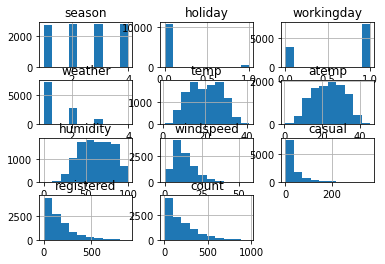

In [15]:
train.hist()

In [16]:
import  datetime as dt

In [28]:
#train['date'] = pd.to_datetime(train['datetime']).dt.date
train['month'] = pd.to_datetime(train['datetime']).dt.month
train['time'] = pd.to_datetime(train['datetime']).dt.hour

In [29]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,12,22


In [30]:
train=train.drop(columns=['datetime'])

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  month       10886 non-null  int64  
 12  time        10886 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 MB


In [32]:
cols=['season','holiday','weather','month','time','workingday']
for col in cols: 
  train[col]=train[col].astype('category')

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  category
 2   workingday  10886 non-null  category
 3   weather     10886 non-null  category
 4   temp        10886 non-null  float64 
 5   atemp       10886 non-null  float64 
 6   humidity    10886 non-null  int64   
 7   windspeed   10886 non-null  float64 
 8   casual      10886 non-null  int64   
 9   registered  10886 non-null  int64   
 10  count       10886 non-null  int64   
 11  month       10886 non-null  category
 12  time        10886 non-null  category
dtypes: category(6), float64(3), int64(4)
memory usage: 661.0 KB


In [34]:
train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,time
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12,19
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12,20
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,21
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,12,22


In [38]:
train_oh=train
def one_hot_encoding(df,column):
  train_oh= pd.concat([df,pd.get_dummies(df[column],prefix=column,drop_first='true')],axis=1)
  train_oh=train_oh.drop([column],axis=1)
  return train_oh

cols=['season','holiday','weather','month','time','workingday']
for col in cols: 
  train_oh=one_hot_encoding(train_oh,col)

In [39]:
train_oh

,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,holiday_1,weather_2,weather_3,weather_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,time_9,time_10,time_11,time_12,time_13,time_14,time_15,time_16,time_17,time_18,time_19,time_20,time_21,time_22,time_23,workingday_1
0,9.84,14.395,81,0.0000,3,13,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9.02,13.635,80,0.0000,8,32,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9.02,13.635,80,0.0000,5,27,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9.84,14.395,75,0.0000,3,10,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9.84,14.395,75,0.0000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,7,329,336,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
10882,14.76,17.425,57,15.0013,10,231,241,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
10883,13.94,15.910,61,15.0013,4,164,168,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
10884,13.94,17.425,61,6.0032,12,117,129,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ed18cbcd0>,
      dtype=object)

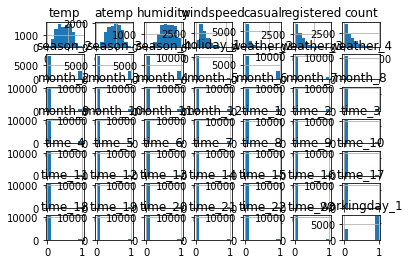

In [42]:
train_oh.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ed05dce50>,
      dtype=object)

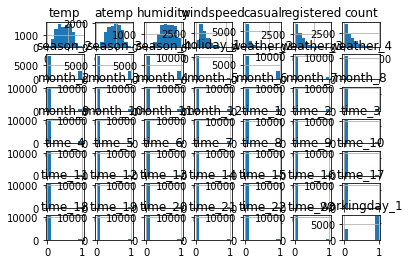

In [44]:
train=train_oh
train.hist()

In [45]:
predictor= TabularPredictor(label ="count").fit(train_data = train, verbosity = 2,presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20220117_122159/"
Presets specified: ['best_quality']
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220117_122159/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 48
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12450.6 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature

[1000]	train_set's rmse: 3.5291	valid_set's rmse: 5.23732
[2000]	train_set's rmse: 2.4715	valid_set's rmse: 4.57927
[3000]	train_set's rmse: 1.94485	valid_set's rmse: 4.33534
[4000]	train_set's rmse: 1.61099	valid_set's rmse: 4.22917
[5000]	train_set's rmse: 1.37612	valid_set's rmse: 4.17491
[6000]	train_set's rmse: 1.19156	valid_set's rmse: 4.14066
[7000]	train_set's rmse: 1.04698	valid_set's rmse: 4.1081
[8000]	train_set's rmse: 0.9288	valid_set's rmse: 4.09685
[9000]	train_set's rmse: 0.830444	valid_set's rmse: 4.08484
[10000]	train_set's rmse: 0.749589	valid_set's rmse: 4.07855


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 3.67619	valid_set's rmse: 6.00644
[2000]	train_set's rmse: 2.59731	valid_set's rmse: 5.25526
[3000]	train_set's rmse: 2.0756	valid_set's rmse: 4.99892
[4000]	train_set's rmse: 1.73358	valid_set's rmse: 4.88006
[5000]	train_set's rmse: 1.47988	valid_set's rmse: 4.83429
[6000]	train_set's rmse: 1.28827	valid_set's rmse: 4.81244
[7000]	train_set's rmse: 1.13938	valid_set's rmse: 4.8014
[8000]	train_set's rmse: 1.01328	valid_set's rmse: 4.79735
[9000]	train_set's rmse: 0.907616	valid_set's rmse: 4.78961
[10000]	train_set's rmse: 0.818467	valid_set's rmse: 4.78495


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 3.5965	valid_set's rmse: 5.32757
[2000]	train_set's rmse: 2.50391	valid_set's rmse: 4.69219
[3000]	train_set's rmse: 1.97965	valid_set's rmse: 4.47111
[4000]	train_set's rmse: 1.64555	valid_set's rmse: 4.36476
[5000]	train_set's rmse: 1.40729	valid_set's rmse: 4.29775
[6000]	train_set's rmse: 1.22663	valid_set's rmse: 4.24974
[7000]	train_set's rmse: 1.08256	valid_set's rmse: 4.215
[8000]	train_set's rmse: 0.962963	valid_set's rmse: 4.19163
[9000]	train_set's rmse: 0.86407	valid_set's rmse: 4.17307
[10000]	train_set's rmse: 0.780415	valid_set's rmse: 4.15552


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 3.6039	valid_set's rmse: 6.73067
[2000]	train_set's rmse: 2.56378	valid_set's rmse: 6.22213
[3000]	train_set's rmse: 2.0395	valid_set's rmse: 6.04624
[4000]	train_set's rmse: 1.70408	valid_set's rmse: 5.95209
[5000]	train_set's rmse: 1.46801	valid_set's rmse: 5.90878
[6000]	train_set's rmse: 1.28011	valid_set's rmse: 5.88785
[7000]	train_set's rmse: 1.13164	valid_set's rmse: 5.87525
[8000]	train_set's rmse: 1.011	valid_set's rmse: 5.85839
[9000]	train_set's rmse: 0.910784	valid_set's rmse: 5.85131
[10000]	train_set's rmse: 0.825093	valid_set's rmse: 5.84625


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 3.56197	valid_set's rmse: 4.81294
[2000]	train_set's rmse: 2.53556	valid_set's rmse: 4.42635
[3000]	train_set's rmse: 1.99581	valid_set's rmse: 4.33163
[4000]	train_set's rmse: 1.65391	valid_set's rmse: 4.30368
[5000]	train_set's rmse: 1.40924	valid_set's rmse: 4.29548
[6000]	train_set's rmse: 1.22367	valid_set's rmse: 4.29047


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 3.4989	valid_set's rmse: 5.66885
[2000]	train_set's rmse: 2.46129	valid_set's rmse: 5.14569
[3000]	train_set's rmse: 1.96578	valid_set's rmse: 4.95681
[4000]	train_set's rmse: 1.63596	valid_set's rmse: 4.85436
[5000]	train_set's rmse: 1.39708	valid_set's rmse: 4.80242
[6000]	train_set's rmse: 1.21669	valid_set's rmse: 4.78304
[7000]	train_set's rmse: 1.07122	valid_set's rmse: 4.76645
[8000]	train_set's rmse: 0.950701	valid_set's rmse: 4.75439
[9000]	train_set's rmse: 0.849091	valid_set's rmse: 4.74612
[10000]	train_set's rmse: 0.764626	valid_set's rmse: 4.73619


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 3.65352	valid_set's rmse: 5.85591
[2000]	train_set's rmse: 2.58494	valid_set's rmse: 5.35733
[3000]	train_set's rmse: 2.0609	valid_set's rmse: 5.2229
[4000]	train_set's rmse: 1.71864	valid_set's rmse: 5.15866
[5000]	train_set's rmse: 1.47236	valid_set's rmse: 5.13131
[6000]	train_set's rmse: 1.27748	valid_set's rmse: 5.10722
[7000]	train_set's rmse: 1.12629	valid_set's rmse: 5.10044
[8000]	train_set's rmse: 1.00168	valid_set's rmse: 5.08639
[9000]	train_set's rmse: 0.898388	valid_set's rmse: 5.08076
[10000]	train_set's rmse: 0.809352	valid_set's rmse: 5.07438


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 3.47365	valid_set's rmse: 5.27772
[2000]	train_set's rmse: 2.46346	valid_set's rmse: 4.86123
[3000]	train_set's rmse: 1.98186	valid_set's rmse: 4.73834
[4000]	train_set's rmse: 1.65441	valid_set's rmse: 4.65916
[5000]	train_set's rmse: 1.41973	valid_set's rmse: 4.62788
[6000]	train_set's rmse: 1.22687	valid_set's rmse: 4.60776
[7000]	train_set's rmse: 1.07753	valid_set's rmse: 4.59088
[8000]	train_set's rmse: 0.959117	valid_set's rmse: 4.58998


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 3.48843	valid_set's rmse: 4.91044
[2000]	train_set's rmse: 2.47541	valid_set's rmse: 4.42035
[3000]	train_set's rmse: 1.96813	valid_set's rmse: 4.22927
[4000]	train_set's rmse: 1.64574	valid_set's rmse: 4.1346
[5000]	train_set's rmse: 1.40907	valid_set's rmse: 4.06683
[6000]	train_set's rmse: 1.23117	valid_set's rmse: 4.02801
[7000]	train_set's rmse: 1.0848	valid_set's rmse: 3.99256
[8000]	train_set's rmse: 0.966698	valid_set's rmse: 3.97044
[9000]	train_set's rmse: 0.866167	valid_set's rmse: 3.95227
[10000]	train_set's rmse: 0.781388	valid_set's rmse: 3.94018


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 3.77167	valid_set's rmse: 4.97778
[2000]	train_set's rmse: 2.67867	valid_set's rmse: 4.46693
[3000]	train_set's rmse: 2.13751	valid_set's rmse: 4.28471
[4000]	train_set's rmse: 1.77579	valid_set's rmse: 4.17515
[5000]	train_set's rmse: 1.51642	valid_set's rmse: 4.11413
[6000]	train_set's rmse: 1.32012	valid_set's rmse: 4.08602
[7000]	train_set's rmse: 1.16303	valid_set's rmse: 4.06376
[8000]	train_set's rmse: 1.03406	valid_set's rmse: 4.04304
[9000]	train_set's rmse: 0.928224	valid_set's rmse: 4.03116
[10000]	train_set's rmse: 0.836352	valid_set's rmse: 4.02666


	-4.5852	 = Validation score   (root_mean_squared_error)
	154.86s	 = Training   runtime
	24.51s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ...
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 1.12806	valid_set's rmse: 2.8228


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 1.09532	valid_set's rmse: 3.25146


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a f

[1000]	train_set's rmse: 1.04632	valid_set's rmse: 3.55532
[2000]	train_set's rmse: 0.630897	valid_set's rmse: 3.50304
[3000]	train_set's rmse: 0.426188	valid_set's rmse: 3.48754


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a f

[1000]	train_set's rmse: 1.16635	valid_set's rmse: 2.46323


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 1.16893	valid_set's rmse: 2.49303
[2000]	train_set's rmse: 0.724698	valid_set's rmse: 2.39551
[3000]	train_set's rmse: 0.517053	valid_set's rmse: 2.34691
[4000]	train_set's rmse: 0.392745	valid_set's rmse: 2.33022
[5000]	train_set's rmse: 0.313196	valid_set's rmse: 2.32325
[6000]	train_set's rmse: 0.25787	valid_set's rmse: 2.31876
[7000]	train_set's rmse: 0.211156	valid_set's rmse: 2.32084


	-3.1433	 = Validation score   (root_mean_squared_error)
	36.48s	 = Training   runtime
	2.55s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ...
	-2.7735	 = Validation score   (root_mean_squared_error)
	15.28s	 = Training   runtime
	1.09s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ...
	-3.234	 = Validation score   (root_mean_squared_error)
	113.02s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1 ...
	-2.8868	 = Validation score   (root_mean_squared_error)
	10.73s	 = Training   runtime
	1.12s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ...
	-3.0643	 = Validation score   (root_mean_squared_error)
	198.67s	 = Training   runtime
	0.64s	 = Validation runtime
Fitting model: XGBoost_BAG_L1 ...
	-4.9586	 = Validation score   (root_mean_squared_error)
	26.15s	 = Training   runtime
	0.25s	 = Validation runtime
Fitting model: NeuralNetMXNet_BAG_L1 ...
	-4.106	 = Validation score   (root_mean_squared_error)
	1821.29s	 = 

[1000]	train_set's rmse: 0.430044	valid_set's rmse: 4.22972
[2000]	train_set's rmse: 0.151249	valid_set's rmse: 4.20859
[3000]	train_set's rmse: 0.0636219	valid_set's rmse: 4.20505
[4000]	train_set's rmse: 0.0279603	valid_set's rmse: 4.20454
[5000]	train_set's rmse: 0.0124448	valid_set's rmse: 4.20428
[6000]	train_set's rmse: 0.0058006	valid_set's rmse: 4.20415
[7000]	train_set's rmse: 0.00280905	valid_set's rmse: 4.2041
[8000]	train_set's rmse: 0.00136055	valid_set's rmse: 4.2041
[9000]	train_set's rmse: 0.000684059	valid_set's rmse: 4.20409
[10000]	train_set's rmse: 0.000356917	valid_set's rmse: 4.20408


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 0.413681	valid_set's rmse: 3.92253
[2000]	train_set's rmse: 0.140592	valid_set's rmse: 3.9049
[3000]	train_set's rmse: 0.0573521	valid_set's rmse: 3.9018
[4000]	train_set's rmse: 0.0261545	valid_set's rmse: 3.90087
[5000]	train_set's rmse: 0.0119339	valid_set's rmse: 3.9007
[6000]	train_set's rmse: 0.00575217	valid_set's rmse: 3.90056
[7000]	train_set's rmse: 0.00283664	valid_set's rmse: 3.90053
[8000]	train_set's rmse: 0.00141787	valid_set's rmse: 3.90051
[9000]	train_set's rmse: 0.000759011	valid_set's rmse: 3.90049
[10000]	train_set's rmse: 0.000386442	valid_set's rmse: 3.90048


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 0.420208	valid_set's rmse: 4.11201
[2000]	train_set's rmse: 0.147475	valid_set's rmse: 4.10526


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 0.428903	valid_set's rmse: 4.18771
[2000]	train_set's rmse: 0.156403	valid_set's rmse: 4.16922
[3000]	train_set's rmse: 0.0639708	valid_set's rmse: 4.16492


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 0.427791	valid_set's rmse: 3.98454
[2000]	train_set's rmse: 0.148653	valid_set's rmse: 3.97443
[3000]	train_set's rmse: 0.0630657	valid_set's rmse: 3.97241
[4000]	train_set's rmse: 0.0283489	valid_set's rmse: 3.97229
[5000]	train_set's rmse: 0.0124462	valid_set's rmse: 3.97231


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 0.412522	valid_set's rmse: 4.34759
[2000]	train_set's rmse: 0.137365	valid_set's rmse: 4.33043
[3000]	train_set's rmse: 0.0542449	valid_set's rmse: 4.32722
[4000]	train_set's rmse: 0.0232676	valid_set's rmse: 4.32645
[5000]	train_set's rmse: 0.0107674	valid_set's rmse: 4.32624
[6000]	train_set's rmse: 0.00507542	valid_set's rmse: 4.32614
[7000]	train_set's rmse: 0.00241634	valid_set's rmse: 4.32609
[8000]	train_set's rmse: 0.00124207	valid_set's rmse: 4.32605
[9000]	train_set's rmse: 0.000619222	valid_set's rmse: 4.32603
[10000]	train_set's rmse: 0.000302087	valid_set's rmse: 4.32603


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 0.429851	valid_set's rmse: 4.2367
[2000]	train_set's rmse: 0.153166	valid_set's rmse: 4.21772
[3000]	train_set's rmse: 0.0596866	valid_set's rmse: 4.21441
[4000]	train_set's rmse: 0.0264977	valid_set's rmse: 4.21366
[5000]	train_set's rmse: 0.0127731	valid_set's rmse: 4.21358
[6000]	train_set's rmse: 0.00585547	valid_set's rmse: 4.21347
[7000]	train_set's rmse: 0.00277721	valid_set's rmse: 4.21345
[8000]	train_set's rmse: 0.00129714	valid_set's rmse: 4.21344
[9000]	train_set's rmse: 0.000646003	valid_set's rmse: 4.21344
[10000]	train_set's rmse: 0.000314125	valid_set's rmse: 4.21344


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 0.433969	valid_set's rmse: 3.81026
[2000]	train_set's rmse: 0.151171	valid_set's rmse: 3.78467
[3000]	train_set's rmse: 0.061373	valid_set's rmse: 3.77981
[4000]	train_set's rmse: 0.0290501	valid_set's rmse: 3.77909
[5000]	train_set's rmse: 0.0136539	valid_set's rmse: 3.77871
[6000]	train_set's rmse: 0.00641817	valid_set's rmse: 3.77866
[7000]	train_set's rmse: 0.00320187	valid_set's rmse: 3.77851
[8000]	train_set's rmse: 0.00153737	valid_set's rmse: 3.7785
[9000]	train_set's rmse: 0.000782115	valid_set's rmse: 3.77847
[10000]	train_set's rmse: 0.000380484	valid_set's rmse: 3.77847


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 0.418784	valid_set's rmse: 3.75826
[2000]	train_set's rmse: 0.14041	valid_set's rmse: 3.73888
[3000]	train_set's rmse: 0.0557709	valid_set's rmse: 3.73506
[4000]	train_set's rmse: 0.0249139	valid_set's rmse: 3.73435
[5000]	train_set's rmse: 0.0112865	valid_set's rmse: 3.73398
[6000]	train_set's rmse: 0.00526426	valid_set's rmse: 3.73397
[7000]	train_set's rmse: 0.00260711	valid_set's rmse: 3.73396


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 0.41613	valid_set's rmse: 3.39074
[2000]	train_set's rmse: 0.136813	valid_set's rmse: 3.36703
[3000]	train_set's rmse: 0.0549653	valid_set's rmse: 3.36274
[4000]	train_set's rmse: 0.0243976	valid_set's rmse: 3.36119
[5000]	train_set's rmse: 0.0112145	valid_set's rmse: 3.36075
[6000]	train_set's rmse: 0.00508363	valid_set's rmse: 3.36052
[7000]	train_set's rmse: 0.00231101	valid_set's rmse: 3.36049
[8000]	train_set's rmse: 0.00110054	valid_set's rmse: 3.36048
[9000]	train_set's rmse: 0.000536821	valid_set's rmse: 3.36047
[10000]	train_set's rmse: 0.000265246	valid_set's rmse: 3.36046


	-3.9856	 = Validation score   (root_mean_squared_error)
	359.18s	 = Training   runtime
	34.49s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	-1.7307	 = Validation score   (root_mean_squared_error)
	0.83s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting 9 L2 models ...
Fitting model: LightGBMXT_BAG_L2 ...
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 2.20079	valid_set's rmse: 4.40048
[2000]	train_set's rmse: 1.59389	valid_set's rmse: 4.25589
[3000]	train_set's rmse: 1.25116	valid_set's rmse: 4.14853
[4000]	train_set's rmse: 1.02589	valid_set's rmse: 4.11261
[5000]	train_set's rmse: 0.860146	valid_set's rmse: 4.10101
[6000]	train_set's rmse: 0.735154	valid_set's rmse: 4.09628
[7000]	train_set's rmse: 0.636506	valid_set's rmse: 4.09849


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 2.19619	valid_set's rmse: 4.50877
[2000]	train_set's rmse: 1.57137	valid_set's rmse: 4.38997
[3000]	train_set's rmse: 1.2422	valid_set's rmse: 4.37019


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 2.28841	valid_set's rmse: 3.59232
[2000]	train_set's rmse: 1.69098	valid_set's rmse: 3.35176
[3000]	train_set's rmse: 1.34462	valid_set's rmse: 3.23577
[4000]	train_set's rmse: 1.10219	valid_set's rmse: 3.18726
[5000]	train_set's rmse: 0.932871	valid_set's rmse: 3.16316
[6000]	train_set's rmse: 0.796008	valid_set's rmse: 3.14348
[7000]	train_set's rmse: 0.689008	valid_set's rmse: 3.12921
[8000]	train_set's rmse: 0.603755	valid_set's rmse: 3.12053
[9000]	train_set's rmse: 0.531715	valid_set's rmse: 3.11344
[10000]	train_set's rmse: 0.47062	valid_set's rmse: 3.11069


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 2.1836	valid_set's rmse: 3.2768
[2000]	train_set's rmse: 1.59221	valid_set's rmse: 3.1631
[3000]	train_set's rmse: 1.25894	valid_set's rmse: 3.09197
[4000]	train_set's rmse: 1.03301	valid_set's rmse: 3.07408
[5000]	train_set's rmse: 0.871652	valid_set's rmse: 3.05759
[6000]	train_set's rmse: 0.74574	valid_set's rmse: 3.04331
[7000]	train_set's rmse: 0.64772	valid_set's rmse: 3.03138
[8000]	train_set's rmse: 0.565019	valid_set's rmse: 3.02426
[9000]	train_set's rmse: 0.497561	valid_set's rmse: 3.01704
[10000]	train_set's rmse: 0.441273	valid_set's rmse: 3.01434


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 2.19788	valid_set's rmse: 3.96462
[2000]	train_set's rmse: 1.60654	valid_set's rmse: 3.80389
[3000]	train_set's rmse: 1.26898	valid_set's rmse: 3.76682


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 2.22186	valid_set's rmse: 4.11607
[2000]	train_set's rmse: 1.5996	valid_set's rmse: 3.80357
[3000]	train_set's rmse: 1.253	valid_set's rmse: 3.73227
[4000]	train_set's rmse: 1.02554	valid_set's rmse: 3.70477
[5000]	train_set's rmse: 0.865138	valid_set's rmse: 3.70236


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 2.22383	valid_set's rmse: 3.67511
[2000]	train_set's rmse: 1.58402	valid_set's rmse: 3.54262


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 2.25183	valid_set's rmse: 3.28616
[2000]	train_set's rmse: 1.59394	valid_set's rmse: 3.1277
[3000]	train_set's rmse: 1.2583	valid_set's rmse: 3.08171
[4000]	train_set's rmse: 1.04946	valid_set's rmse: 3.04939
[5000]	train_set's rmse: 0.887082	valid_set's rmse: 3.03776


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 2.30465	valid_set's rmse: 3.52489
[2000]	train_set's rmse: 1.63465	valid_set's rmse: 3.26091
[3000]	train_set's rmse: 1.27969	valid_set's rmse: 3.16365
[4000]	train_set's rmse: 1.04167	valid_set's rmse: 3.11487
[5000]	train_set's rmse: 0.873227	valid_set's rmse: 3.07527
[6000]	train_set's rmse: 0.747191	valid_set's rmse: 3.04685
[7000]	train_set's rmse: 0.646032	valid_set's rmse: 3.03324
[8000]	train_set's rmse: 0.564975	valid_set's rmse: 3.02001
[9000]	train_set's rmse: 0.496492	valid_set's rmse: 3.01024
[10000]	train_set's rmse: 0.440758	valid_set's rmse: 3.00358


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 2.25587	valid_set's rmse: 4.12745
[2000]	train_set's rmse: 1.58904	valid_set's rmse: 3.9658
[3000]	train_set's rmse: 1.25426	valid_set's rmse: 3.94118
[4000]	train_set's rmse: 1.02671	valid_set's rmse: 3.92336


	-3.5847	 = Validation score   (root_mean_squared_error)
	135.56s	 = Training   runtime
	12.27s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ...
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of Ligh

[1000]	train_set's rmse: 1.0497	valid_set's rmse: 1.45146


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a f

In [46]:
prediction_new_feature=predictor.predict(train)
#predictions.head()
prediction_new_feature

0         16.193033
1         40.096569
2         32.185486
3         13.141837
4          1.074431
            ...    
10881    336.121124
10882    241.443695
10883    167.940979
10884    129.121338
10885     87.924789
Name: count, Length: 10886, dtype: float32

In [47]:
prediction_new_feature.describe()

count    10886.000000
mean       191.604797
std        181.167328
min          1.022456
25%         42.075849
50%        144.882637
75%        283.879440
max        965.984924
Name: count, dtype: float64

In [49]:
submission["count"] = prediction_new_feature
submission.to_csv("submission_new_feature.csv", index=False)
#submission["count"] = predictions
#submission.to_csv("submission.csv", index=False)

In [50]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_feature.csv -m "new_features"

100% 188k/188k [00:00<00:00, 890kB/s]
Successfully submitted to Bike Sharing Demand

In [51]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                    date                 description           status    publicScore  privateScore  
--------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_feature.csv  2022-01-17 14:09:29  new_features          complete  1.97321      1.97321       
submission.csv              2022-01-16 21:42:39  first raw submission  complete  1.97196      1.97196       
